# LoanTap

# Define Problem Statement and perform Exploratory Data Analysis

## Definition of problem

Given a set of attributes for an Individual, determine if a credit line should be extended to them
To achieve this:
- perform EDA on the data
- prep the data for Logistic regression
- perform logistic regression
- identify the best model for solution
- balance the trade-off between valid loan disbursement and reducing NPA

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import t, norm, ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr ,spearmanr
from scipy import stats
import statsmodels.api as sm
import statistics
from scipy.stats import poisson, binom
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

## Observations on shape of data

In [2]:
df  = pd.read_csv("loantap.csv")

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.shape

(396030, 27)

Comment: there are 27 columns and 396030 rows

## data types of all the attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## missing value detection

In [6]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## statistical summary

In [7]:
df.describe() # statistics of numeric values

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
df.describe(include=['object'])  # statistics of non-numeric values

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


## Univariate Analysis

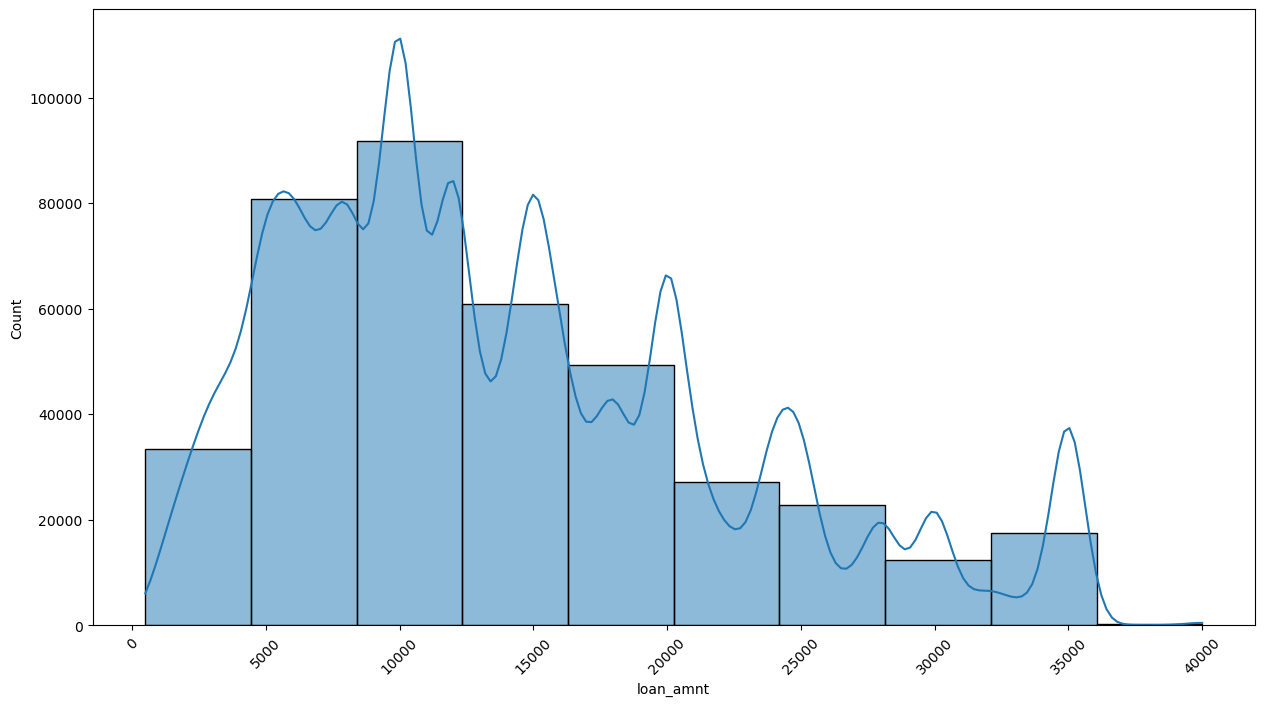

In [10]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="loan_amnt", bins=10, data = df, kde=True)
plt.show()

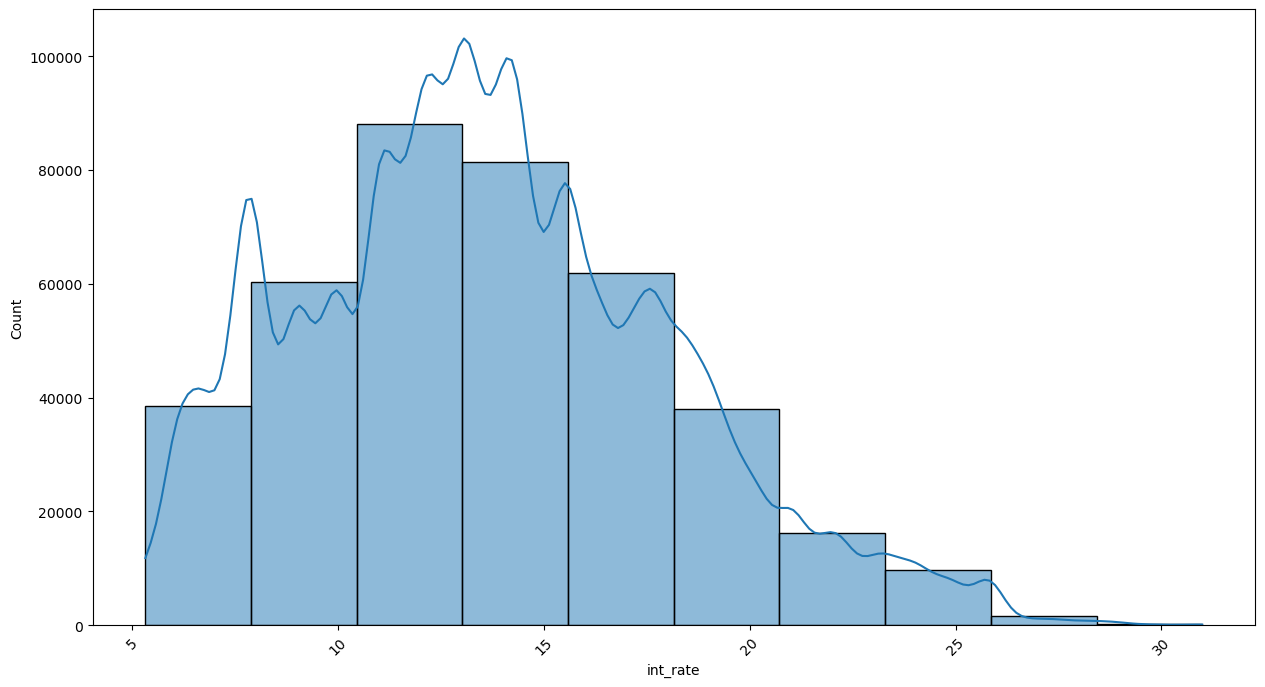

In [11]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="int_rate", bins=10, data = df, kde=True)
plt.show()

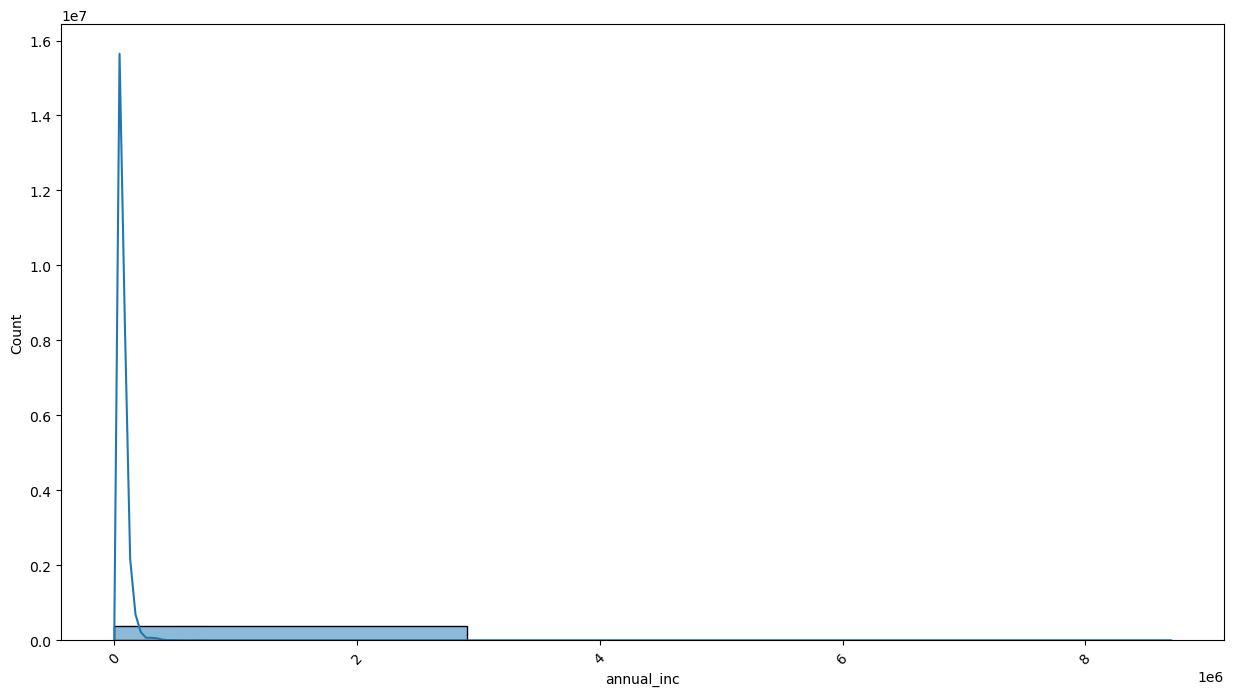

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="annual_inc", bins=3, data = df, kde=True)
plt.show()

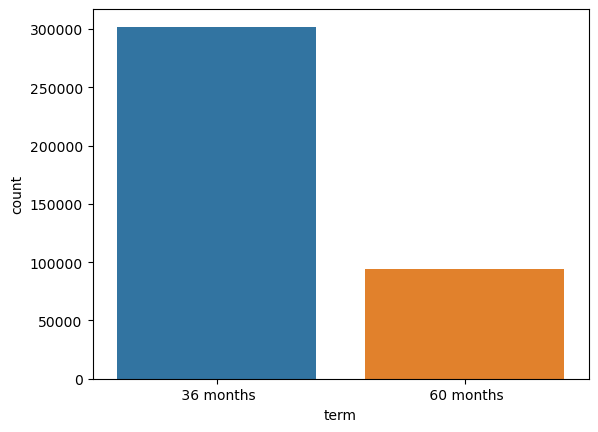

In [16]:
sns.countplot(x ='term', data = df)
plt.show()

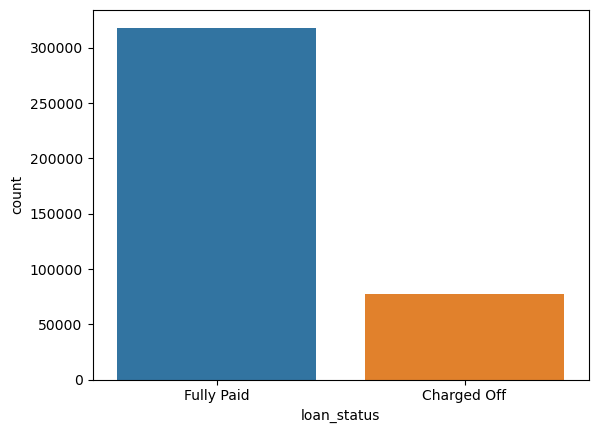

In [17]:
sns.countplot(x ='loan_status', data = df)
plt.show()

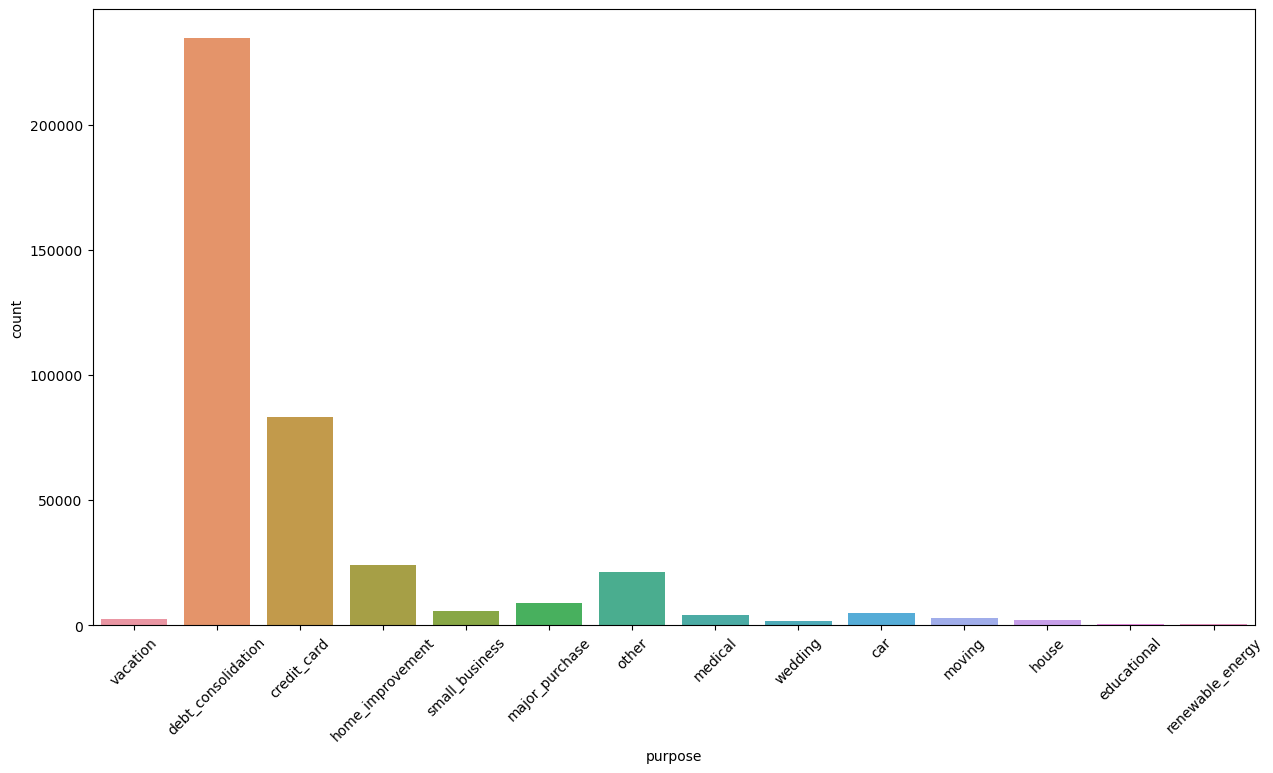

In [21]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='purpose', data = df)
plt.show()

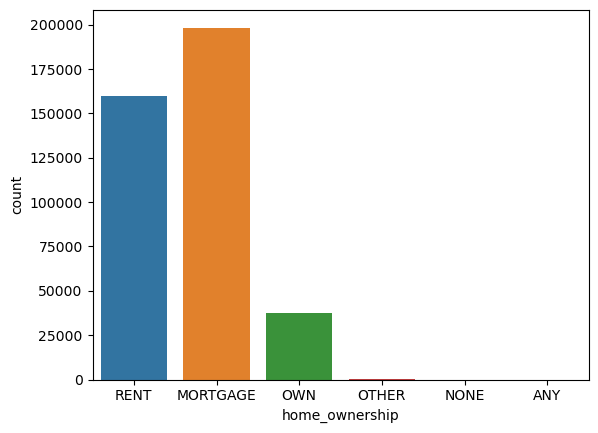

In [19]:
sns.countplot(x ='home_ownership', data = df)
plt.show()

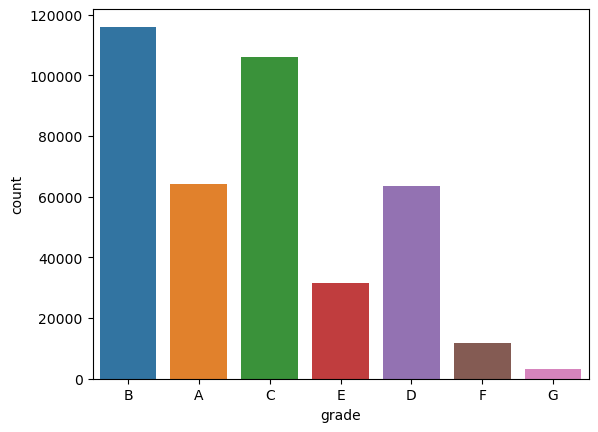

In [20]:
sns.countplot(x ='grade', data = df)
plt.show()

## Bivariate Analysis

### correlation among independent variables

<AxesSubplot:>

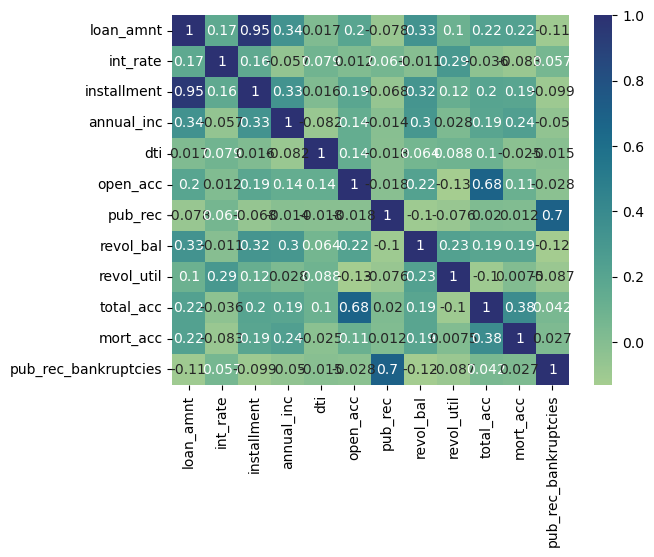

In [22]:
sns.heatmap(df.corr(),annot=True, cmap="crest")

<Figure size 800x800 with 0 Axes>

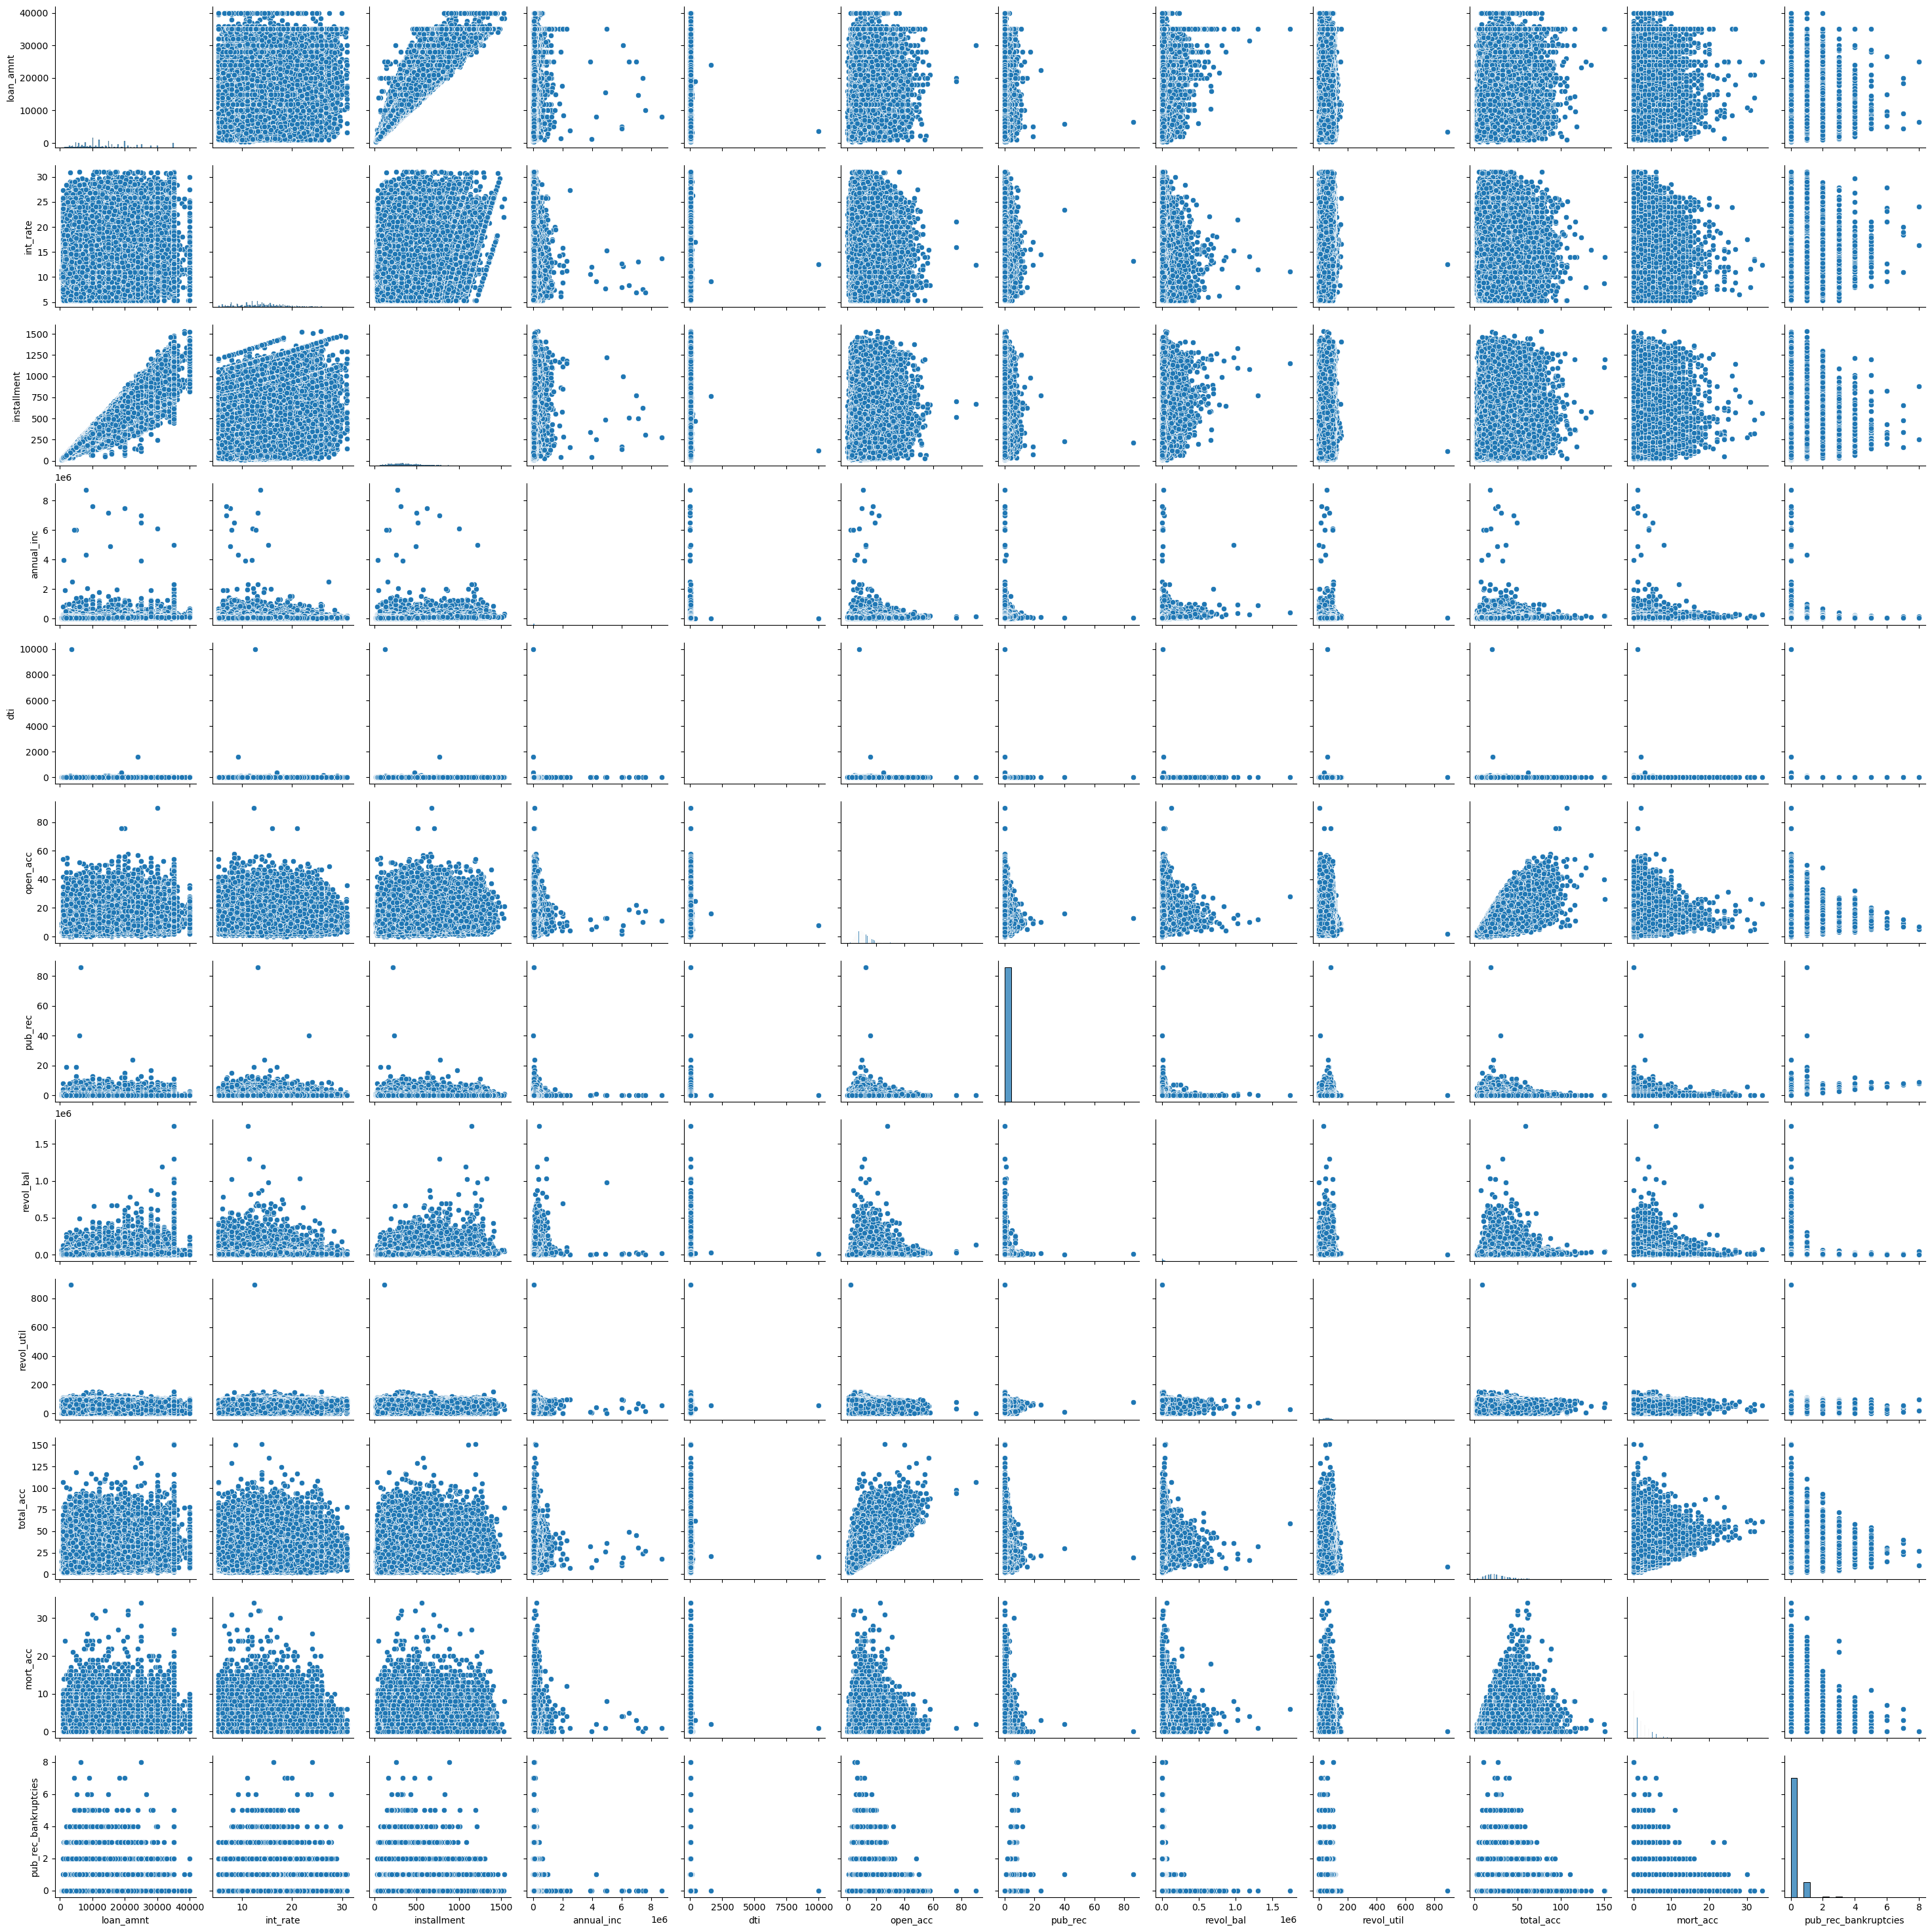

In [23]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.iloc[:, :])

## insights based on EDA

 - Strong correlation between pub_rec and pub_rec_bankruptcies
 - Strong correlation between loan ammount and installments
 - debt consolidation is the most common purpose
 - 36 months is the most common loan tenure

# Data Preprocessing 

## Duplicate value check

In [24]:
df.duplicated().sum()

0

No Duplicate rows identified

## Missing value treatment

In [25]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [27]:
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])

In [29]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [31]:
df['title'] = df['title'].fillna(df['title'].mode()[0])

In [33]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [35]:
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

In [38]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

In [39]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

**Comment:** As can be seen all outlier has been removed

## Outlier treatment

In [45]:
df_num = df.select_dtypes(exclude = ['object'])
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


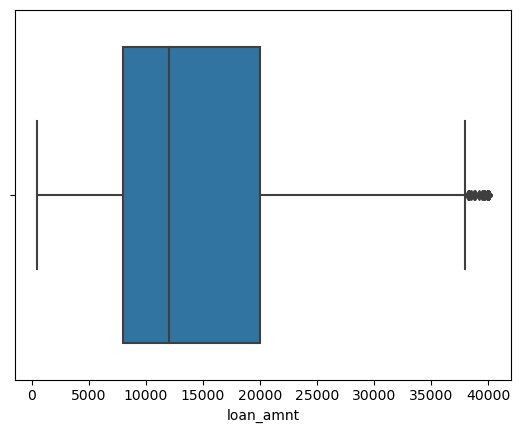

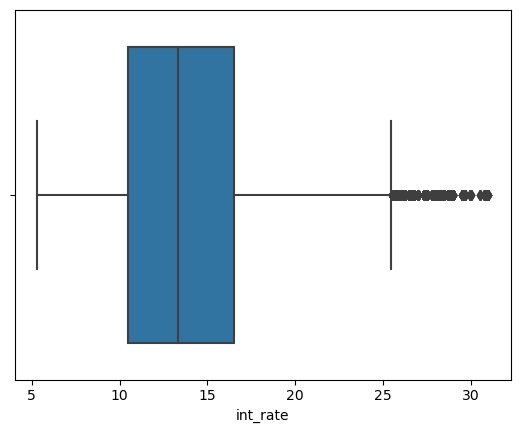

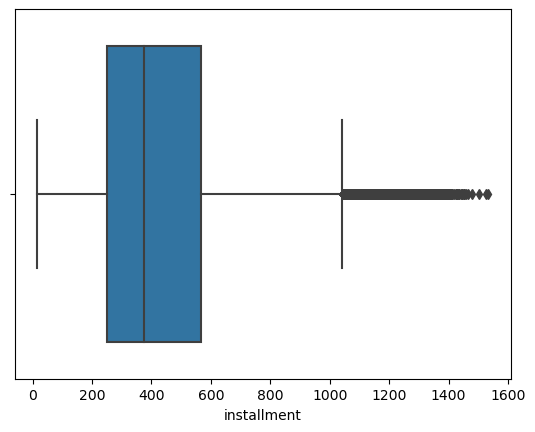

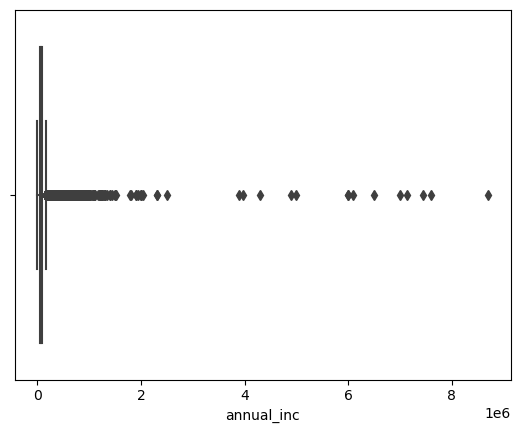

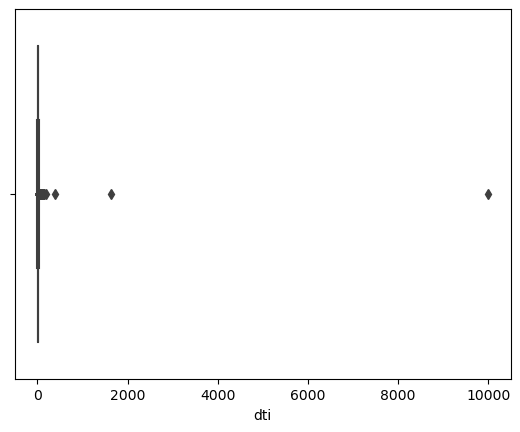

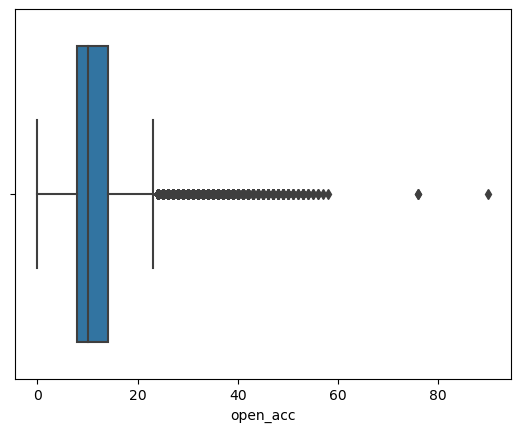

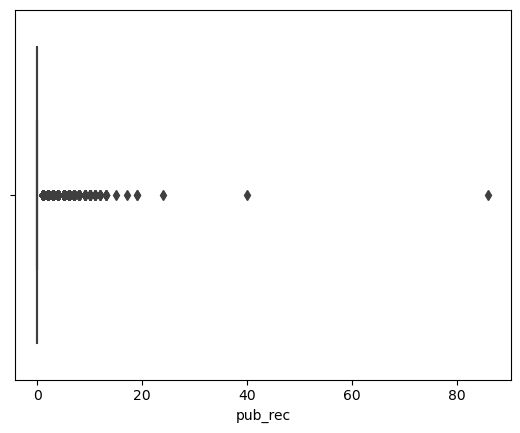

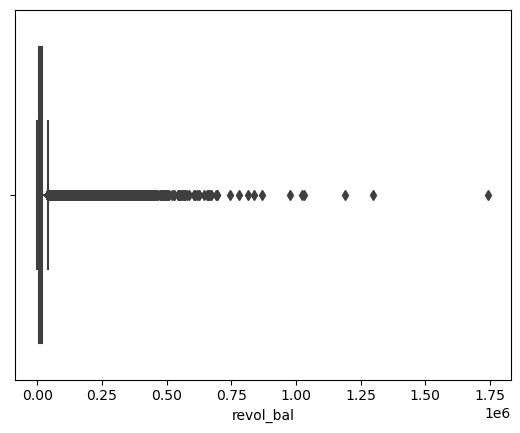

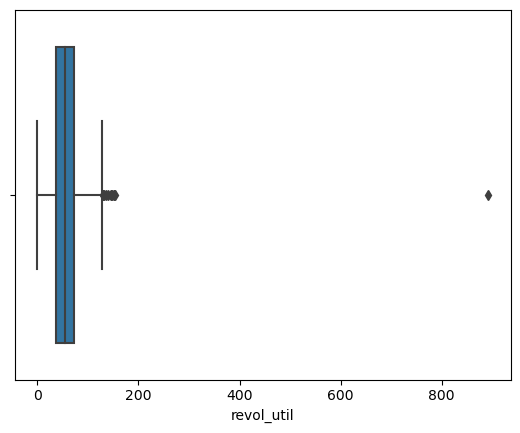

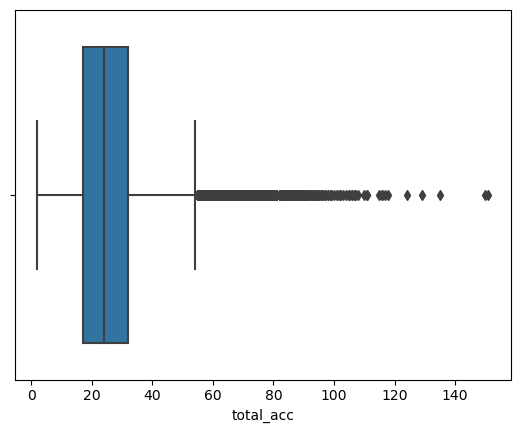

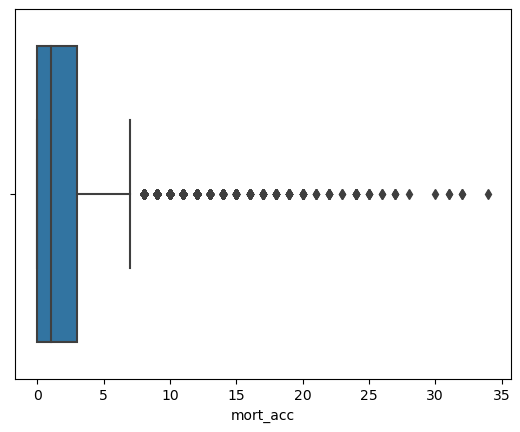

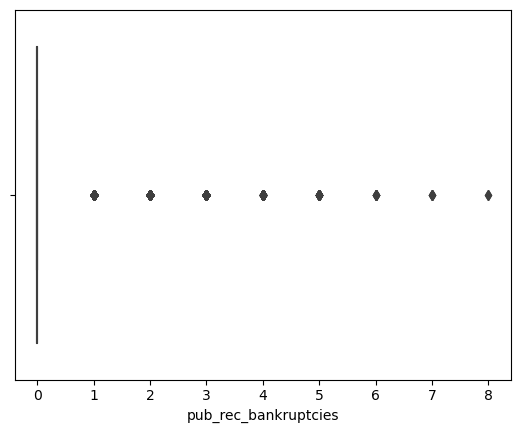

In [57]:

for series_name, series in df_num.items():
    plt.figure(series_name)
    sns.boxplot(x=df_num[series_name])
    



In [60]:
p25 = df['loan_amnt'].quantile(0.25)
p75 = df['loan_amnt'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print(upper_limit , lower_limit)

38000.0 -10000.0


In [61]:
df[df['loan_amnt'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
3998,40000.0,60 months,22.45,1115.02,E,E5,Senior Project Engineer,8 years,OWN,92885.0,...,22.0,0.0,44216.0,59.0,41.0,w,INDIVIDUAL,7.0,0.0,"402 Strickland Path Suite 790\r\nWattsborough,..."
4788,40000.0,60 months,8.39,818.55,B,B1,Partner,6 years,MORTGAGE,655000.0,...,12.0,0.0,205916.0,7.0,22.0,f,INDIVIDUAL,8.0,0.0,"6423 Obrien Dale Apt. 994\r\nSouth Darryl, MO ..."
6093,38225.0,36 months,25.69,1533.81,F,F1,general manager,3 years,MORTGAGE,320000.0,...,21.0,1.0,47806.0,28.2,77.0,f,INDIVIDUAL,8.0,1.0,"39219 Andrew Canyon\r\nGallowayshire, OK 30723"
7456,40000.0,36 months,15.59,1398.20,C,C5,Nursing Mgr,3 years,MORTGAGE,180000.0,...,23.0,0.0,4249.0,3.3,45.0,w,INDIVIDUAL,4.0,0.0,"79951 Ward Walks Apt. 408\r\nKerrbury, VA 00813"
8391,40000.0,36 months,5.32,1204.60,A,A1,Vice President Digital Security Services,< 1 year,RENT,455000.0,...,6.0,0.0,2535.0,14.1,26.0,w,INDIVIDUAL,7.0,0.0,"521 Barry Stravenue Suite 623\r\nNorth Kristy,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384312,40000.0,36 months,11.47,1318.47,B,B5,Account Manager,< 1 year,MORTGAGE,180000.0,...,14.0,0.0,50815.0,57.0,25.0,w,INDIVIDUAL,4.0,0.0,Unit 9830 Box 3496\r\nDPO AA 48052
387907,40000.0,60 months,10.99,869.50,B,B4,Network Systems Engineer,10+ years,RENT,115000.0,...,6.0,0.0,29294.0,84.4,17.0,w,INDIVIDUAL,2.0,0.0,"4598 Peterson Dale Suite 911\r\nRebekahside, W..."
388146,40000.0,60 months,19.99,1059.54,D,D4,Air traffic Controller,10+ years,RENT,160000.0,...,9.0,0.0,17817.0,46.4,32.0,f,INDIVIDUAL,2.0,0.0,"283 Michael Villages\r\nLake Carmen, NC 29597"
388675,40000.0,36 months,9.75,1286.00,B,B3,Clinical Case Manager (Chiropractor),4 years,MORTGAGE,78000.0,...,12.0,0.0,42367.0,92.7,44.0,w,JOINT,4.0,0.0,"7380 Sarah Underpass\r\nPort Jillborough, KS 0..."


In [62]:
df.drop(df[df['loan_amnt'] > upper_limit].index, inplace=True)
df[df['loan_amnt'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [63]:
p25 = df['int_rate'].quantile(0.25)
p75 = df['int_rate'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print(upper_limit , lower_limit)

25.489999999999995 1.4900000000000038


In [64]:
df[df['int_rate'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\r\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\r\nJacksonstad, MI 93700"
133,13075.0,60 months,27.31,401.68,G,G2,Clerk-specialist level,10+ years,MORTGAGE,54777.0,...,4.0,0.0,3845.0,59.2,27.0,f,INDIVIDUAL,2.0,0.0,1532 Gill Greens Apt. 236\r\nSouth Cassandrafu...
168,11800.0,60 months,28.99,374.49,G,G5,Teacher,10+ years,RENT,44011.0,...,9.0,1.0,6313.0,67.2,13.0,f,INDIVIDUAL,0.0,1.0,3019 Smith Manors Suite 402\r\nLake Anthonybur...
204,34350.0,60 months,28.99,1090.13,G,G5,Quality improvement data analyst,3 years,RENT,84000.0,...,11.0,1.0,8400.0,85.7,23.0,w,INDIVIDUAL,0.0,1.0,"5050 Gomez Mill Suite 557\r\nEast Adamton, SD ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395425,14750.0,60 months,28.99,468.11,G,G5,Executive Recruiter,10+ years,MORTGAGE,41000.0,...,5.0,1.0,1153.0,25.6,39.0,w,INDIVIDUAL,3.0,1.0,"3210 Mcintyre Way\r\nSouth Christophermouth, S..."
395475,13075.0,60 months,26.57,395.90,F,F5,maintenance lead,10+ years,MORTGAGE,75000.0,...,6.0,1.0,6625.0,69.7,8.0,w,INDIVIDUAL,1.0,0.0,"PSC 1199, Box 5197\r\nAPO AP 29597"
395566,10875.0,60 months,26.77,330.58,G,G1,Operator,9 years,RENT,32000.0,...,8.0,0.0,9515.0,63.4,10.0,w,INDIVIDUAL,0.0,0.0,050 Shepard Ports Apt. 401\r\nEast Matthewland...
395628,14400.0,60 months,25.88,430.13,F,F4,Staff Accountant,2 years,RENT,36300.0,...,21.0,0.0,3014.0,27.7,27.0,w,INDIVIDUAL,0.0,0.0,"04514 Walter Park Apt. 200\r\nLake Richardton,..."


In [65]:
df.drop(df[df['int_rate'] > upper_limit].index, inplace=True)
df[df['int_rate'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [66]:
p25 = df['installment'].quantile(0.25)
p75 = df['installment'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print(upper_limit , lower_limit)

1036.74 -222.78


In [67]:
df[df['installment'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
11,35000.0,36 months,14.64,1207.13,C,C3,Director Bureau of Equipment Inventory,8 years,MORTGAGE,130000.00,...,30.0,0.0,81263.0,18.7,61.0,w,INDIVIDUAL,4.0,0.0,"3126 Sean Dale Apt. 141\r\nSouth Matthew, MS 0..."
18,34000.0,36 months,7.90,1063.87,A,A4,Pilot,10+ years,RENT,130580.00,...,16.0,0.0,8767.0,11.9,36.0,f,INDIVIDUAL,3.0,0.0,"254 Mary Ferry\r\nPort Kirstenborough, CO 70466"
57,35000.0,36 months,14.16,1198.94,C,C2,Administrator,9 years,MORTGAGE,118497.84,...,8.0,0.0,8148.0,83.1,59.0,f,INDIVIDUAL,3.0,0.0,"578 Smith View Suite 106\r\nMiguelfort, IN 29597"
95,30000.0,36 months,16.49,1061.99,D,D3,Sergeant Major,10+ years,RENT,101000.00,...,7.0,1.0,6080.0,76.0,15.0,f,INDIVIDUAL,2.0,1.0,"2528 Herrera Track Suite 897\r\nSavannahburgh,..."
103,30000.0,36 months,15.31,1044.52,C,C2,Alice G. Alatorre DDS.,9 years,MORTGAGE,108000.00,...,8.0,0.0,19430.0,84.8,15.0,w,INDIVIDUAL,0.0,0.0,"453 Murray Stream\r\nSouth Cathyfort, IL 93700"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395828,35000.0,36 months,14.09,1197.75,B,B5,Peoples Bank,10+ years,MORTGAGE,120000.00,...,8.0,0.0,36748.0,82.6,19.0,w,INDIVIDUAL,6.0,0.0,"780 Carla Point\r\nKristenmouth, AL 30723"
395836,35000.0,36 months,12.99,1179.12,B,B4,Director,2 years,RENT,160000.00,...,14.0,0.0,35383.0,29.2,34.0,w,INDIVIDUAL,2.0,0.0,"567 Nicholas Brook Apt. 814\r\nLarsenville, IL..."
395909,32500.0,36 months,18.99,1191.16,E,E1,Asst Project Manager,3 years,OWN,65000.00,...,12.0,0.0,30198.0,84.1,16.0,f,INDIVIDUAL,0.0,0.0,"717 Villarreal Ridge\r\nLloydport, NV 70466"
395964,31300.0,36 months,18.85,1144.97,D,D3,Digidesign,6 years,RENT,78300.00,...,14.0,0.0,31779.0,46.7,28.0,w,INDIVIDUAL,0.0,0.0,"076 Aguilar Loop Apt. 994\r\nLake Dianeland, M..."


In [68]:
df.drop(df[df['installment'] > upper_limit].index, inplace=True)
df[df['installment'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [69]:
p25 = df['revol_util'].quantile(0.25)
p75 = df['revol_util'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print(upper_limit , lower_limit)

127.94999999999999 -19.649999999999984


In [70]:
df[df['revol_util'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
16793,18000.0,60 months,17.57,452.89,D,D4,District sales manager,8 years,MORTGAGE,136000.0,...,13.0,0.0,13650.0,129.4,31.0,w,INDIVIDUAL,2.0,0.0,912 Lindsay Drive Suite 555\r\nLake Alexandria...
65687,10000.0,36 months,14.16,342.56,C,C2,Superintendent,10+ years,OWN,91000.0,...,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\r\nJenniferview, WI ..."
82600,12000.0,60 months,16.55,295.34,D,D2,Teacher,10+ years,MORTGAGE,45600.0,...,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\r\nPort Heatherbury, NE 48052"
108246,10000.0,36 months,17.27,357.88,D,D2,Driller Apprentice,2 years,RENT,60000.0,...,4.0,0.0,4100.0,136.7,6.0,f,INDIVIDUAL,0.0,0.0,"8513 Simpson Islands\r\nNorth Joshua, ID 22690"
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,...,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813"
153970,12550.0,60 months,16.49,308.47,D,D3,Manager,4 years,OWN,30000.0,...,8.0,0.0,13082.0,129.5,14.0,w,INDIVIDUAL,0.0,0.0,"1475 Travis Fords\r\nJameston, AR 22690"
165111,12600.0,36 months,8.39,397.11,A,A5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,...,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\r\nLake Daniel, O..."
211426,9175.0,36 months,17.57,329.73,D,D4,Deckhand,6 years,RENT,45000.0,...,4.0,0.0,18632.0,132.1,10.0,f,INDIVIDUAL,0.0,0.0,"4102 Leonard Unions\r\nEast Heather, SC 22690"
296174,12000.0,36 months,20.31,447.87,D,D5,World Travel Holdings,5 years,MORTGAGE,200000.0,...,9.0,0.0,27233.0,140.4,28.0,f,INDIVIDUAL,4.0,0.0,"968 Hamilton River\r\nFinleybury, VA 00813"
312268,8000.0,36 months,11.99,265.68,C,C1,SR SAP SECURITY CONSULTANT,4 years,MORTGAGE,105000.0,...,5.0,0.0,7000.0,145.8,19.0,w,INDIVIDUAL,1.0,0.0,95846 James Brook Apt. 765\r\nNorth Brandiview...


In [71]:
df.drop(df[df['revol_util'] > upper_limit].index, inplace=True)
df[df['revol_util'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [72]:
p25 = df['mort_acc'].quantile(0.25)
p75 = df['mort_acc'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print(upper_limit , lower_limit)

7.5 -4.5


In [73]:
df[df['mort_acc'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
40,35000.0,60 months,16.99,869.66,D,D1,Teacher,4 years,MORTGAGE,130000.0,...,10.0,0.0,34130.0,53.8,27.0,f,INDIVIDUAL,10.0,0.0,"8268 Reed Gardens Suite 996\r\nEast Johnmouth,..."
177,25600.0,36 months,7.69,798.56,A,A4,Electrical Engineer,10+ years,MORTGAGE,105000.0,...,15.0,0.0,27528.0,53.1,35.0,w,INDIVIDUAL,10.0,0.0,71558 Shaw Mountain Suite 811\r\nWest Robertmo...
235,20000.0,36 months,11.99,664.20,B,B5,Aviation Safety Inspector,6 years,MORTGAGE,98000.0,...,19.0,0.0,86411.0,84.3,37.0,f,INDIVIDUAL,12.0,0.0,"2390 Miller Burgs\r\nNew Steven, VA 29597"
302,27200.0,60 months,23.99,782.34,F,F2,GM,2 years,RENT,72000.0,...,9.0,1.0,10123.0,67.0,49.0,w,INDIVIDUAL,11.0,1.0,"4090 Sarah Islands Apt. 161\r\nWattsview, IL 7..."
354,35000.0,60 months,22.99,986.47,F,F1,Half owner,8 years,OWN,250000.0,...,7.0,0.0,657.0,32.8,31.0,w,INDIVIDUAL,8.0,0.0,"0753 Thomas Rue Apt. 166\r\nWest Beth, CO 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395543,25000.0,60 months,14.64,590.04,C,C3,Technician,10+ years,MORTGAGE,138000.0,...,25.0,0.0,50312.0,45.3,53.0,w,INDIVIDUAL,9.0,0.0,"1493 Laura Square\r\nMasonville, IA 22690"
395727,12000.0,36 months,8.39,378.20,B,B1,Plant operator,10+ years,MORTGAGE,125000.0,...,7.0,0.0,44819.0,67.0,38.0,w,INDIVIDUAL,8.0,0.0,"015 Julie Crossroad\r\nFieldsmouth, UT 70466"
395800,21000.0,36 months,11.67,694.20,B,B4,Office Manager,2 years,MORTGAGE,70000.0,...,15.0,1.0,15021.0,33.2,28.0,w,INDIVIDUAL,8.0,1.0,"98137 Scott Plaza Suite 408\r\nJoshuaburgh, OH..."
395879,24000.0,60 months,13.99,558.32,C,C4,Managing Princiap,4 years,MORTGAGE,180000.0,...,13.0,2.0,12034.0,65.0,32.0,w,INDIVIDUAL,10.0,1.0,"5839 Anne Turnpike Apt. 643\r\nAbigailfurt, NM..."


In [74]:
df.drop(df[df['mort_acc'] > upper_limit].index, inplace=True)
df[df['mort_acc'] > upper_limit]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


**Comment:** All the noticible outliers removed

## Feature engineering

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374836 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             374836 non-null  float64
 1   term                  374836 non-null  object 
 2   int_rate              374836 non-null  float64
 3   installment           374836 non-null  float64
 4   grade                 374836 non-null  object 
 5   sub_grade             374836 non-null  object 
 6   emp_title             374836 non-null  object 
 7   emp_length            374836 non-null  object 
 8   home_ownership        374836 non-null  object 
 9   annual_inc            374836 non-null  float64
 10  verification_status   374836 non-null  object 
 11  issue_d               374836 non-null  object 
 12  loan_status           374836 non-null  object 
 13  purpose               374836 non-null  object 
 14  title                 374836 non-null  object 
 15  

### Creation of Flags- If value greater than 1.0 then 1 else 0 on Pub_rec

In [77]:
df["is_pub_rec"] = np.where(df["pub_rec"] > 1.0, 1, 0)

In [79]:
df["is_pub_rec"].unique()

array([0, 1])

### Creation of Flags- If value greater than 1.0 then 1 else 0 on Mort_acc

In [80]:
df["is_mort_acc"] = np.where(df["mort_acc"] > 1.0, 1, 0)

In [81]:
df["is_mort_acc"].unique()

array([0, 1])

### Creation of Flags- If value greater than 1.0 then 1 else 0 on Pub_rec_bankruptcies

In [82]:
df["is_pub_rec_bankruptcies"] = np.where(df["pub_rec_bankruptcies"] > 1.0, 1, 0)

In [83]:
df["is_pub_rec_bankruptcies"].unique()

array([0, 1])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374836 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                374836 non-null  float64
 1   term                     374836 non-null  object 
 2   int_rate                 374836 non-null  float64
 3   installment              374836 non-null  float64
 4   grade                    374836 non-null  object 
 5   sub_grade                374836 non-null  object 
 6   emp_title                374836 non-null  object 
 7   emp_length               374836 non-null  object 
 8   home_ownership           374836 non-null  object 
 9   annual_inc               374836 non-null  float64
 10  verification_status      374836 non-null  object 
 11  issue_d                  374836 non-null  object 
 12  loan_status              374836 non-null  object 
 13  purpose                  374836 non-null  object 
 14  titl

## Data preparation for modeling

### Handling non-numerical data columns

In [85]:
df_object = df.select_dtypes(include = ['object'])
df_object.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [88]:
df.describe(include = ['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address,term_months
count,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836,374836
unique,2,7,35,166190,11,6,3,115,2,14,47388,681,2,3,372723,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\r\nFPO AP 70466,36
freq,286120,111731,25679,25916,134819,184259,126944,14054,301828,221605,144625,2900,225638,374216,8,286120


In [86]:
temp=df["term"].str.split(" ",  expand = True)
temp

,0,1,2
0,,36,months
1,,36,months
2,,36,months
3,,36,months
4,,60,months
...,...,...,...
396025,,60,months
396026,,36,months
396027,,36,months
396028,,60,months


In [87]:
df["term_months"]= temp[1]
df["term_months"].head()

0    36
1    36
2    36
3    36
4    60
Name: term_months, dtype: object

In [90]:
enc = OrdinalEncoder()

df[["grade","sub_grade", "home_ownership","verification_status","purpose","initial_list_status","application_type","term_months","emp_length"]] = enc.fit_transform(df[["grade","sub_grade", "home_ownership","verification_status","purpose","initial_list_status","application_type","term_months","emp_length"]])

df_object = df.select_dtypes(include = ['object'])
df_object.head() # identify object columns that should not be encoded and dropped from the data frame

,term,emp_title,issue_d,loan_status,title,earliest_cr_line,address
0,36 months,Marketing,Jan-2015,Fully Paid,Vacation,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,Credit analyst,Jan-2015,Fully Paid,Debt consolidation,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,Statistician,Jan-2015,Fully Paid,Credit card refinancing,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,Client Advocate,Nov-2014,Fully Paid,Credit card refinancing,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,Destiny Management Inc.,Apr-2013,Charged Off,Credit Card Refinance,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"


In [91]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
0,10000.0,36 months,11.44,329.48,1.0,8.0,Marketing,1.0,5.0,117000.0,...,25.0,1.0,1.0,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0.0
1,8000.0,36 months,11.99,265.68,1.0,9.0,Credit analyst,4.0,1.0,65000.0,...,27.0,0.0,1.0,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,0.0
2,15600.0,36 months,10.49,506.97,1.0,7.0,Statistician,10.0,5.0,43057.0,...,26.0,0.0,1.0,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0.0
3,7200.0,36 months,6.49,220.65,0.0,1.0,Client Advocate,6.0,5.0,54000.0,...,13.0,0.0,1.0,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,0.0
4,24375.0,60 months,17.27,609.33,2.0,14.0,Destiny Management Inc.,9.0,1.0,55000.0,...,43.0,0.0,1.0,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,1.0


In [92]:
# Dropping un-required columns
df.drop(["term","emp_title","issue_d","title","earliest_cr_line","address"], axis=1, inplace=True)
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
0,10000.0,11.44,329.48,1.0,8.0,1.0,5.0,117000.0,0.0,Fully Paid,...,41.8,25.0,1.0,1.0,0.0,0.0,0,0,0,0.0
1,8000.0,11.99,265.68,1.0,9.0,4.0,1.0,65000.0,0.0,Fully Paid,...,53.3,27.0,0.0,1.0,3.0,0.0,0,1,0,0.0
2,15600.0,10.49,506.97,1.0,7.0,10.0,5.0,43057.0,1.0,Fully Paid,...,92.2,26.0,0.0,1.0,0.0,0.0,0,0,0,0.0
3,7200.0,6.49,220.65,0.0,1.0,6.0,5.0,54000.0,0.0,Fully Paid,...,21.5,13.0,0.0,1.0,0.0,0.0,0,0,0,0.0
4,24375.0,17.27,609.33,2.0,14.0,9.0,1.0,55000.0,2.0,Charged Off,...,69.8,43.0,0.0,1.0,1.0,0.0,0,0,0,1.0


### Encoding and splitting target variable

In [94]:
le = LabelEncoder()
df["loan_status"] = le.fit_transform(df["loan_status"])

In [95]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
0,10000.0,11.44,329.48,1.0,8.0,1.0,5.0,117000.0,0.0,1,...,41.8,25.0,1.0,1.0,0.0,0.0,0,0,0,0.0
1,8000.0,11.99,265.68,1.0,9.0,4.0,1.0,65000.0,0.0,1,...,53.3,27.0,0.0,1.0,3.0,0.0,0,1,0,0.0
2,15600.0,10.49,506.97,1.0,7.0,10.0,5.0,43057.0,1.0,1,...,92.2,26.0,0.0,1.0,0.0,0.0,0,0,0,0.0
3,7200.0,6.49,220.65,0.0,1.0,6.0,5.0,54000.0,0.0,1,...,21.5,13.0,0.0,1.0,0.0,0.0,0,0,0,0.0
4,24375.0,17.27,609.33,2.0,14.0,9.0,1.0,55000.0,2.0,0,...,69.8,43.0,0.0,1.0,1.0,0.0,0,0,0,1.0


In [96]:
y = df["loan_status"]
df.drop(columns=["loan_status"],inplace=True)

### Scaling - Using MinMaxScaler or StandardScaler

In [114]:
min_max_scaler=MinMaxScaler()
df=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
0,0.253333,0.304175,0.307065,0.166667,0.235294,0.1,1.0,0.013438,0.0,0.923077,...,0.327586,0.172932,1.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.200000,0.331511,0.244555,0.166667,0.264706,0.4,0.2,0.007466,0.0,0.153846,...,0.417712,0.187970,0.0,0.5,0.428571,0.0,0.0,1.0,0.0,0.0
2,0.402667,0.256958,0.480968,0.166667,0.205882,1.0,1.0,0.004945,0.5,0.076923,...,0.722571,0.180451,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.178667,0.058151,0.200435,0.000000,0.029412,0.6,1.0,0.006202,0.0,0.076923,...,0.168495,0.082707,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.636667,0.593936,0.581259,0.333333,0.411765,0.9,0.2,0.006317,1.0,0.076923,...,0.547022,0.308271,0.0,0.5,0.142857,0.0,0.0,0.0,0.0,1.0


In [115]:
X_train,X_test,y_train,y_test= train_test_split(df,y,test_size=0.2,random_state=10)

In [116]:
X_train.info()
X_test.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299868 entries, 28788 to 345353
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                299868 non-null  float64
 1   int_rate                 299868 non-null  float64
 2   installment              299868 non-null  float64
 3   grade                    299868 non-null  float64
 4   sub_grade                299868 non-null  float64
 5   emp_length               299868 non-null  float64
 6   home_ownership           299868 non-null  float64
 7   annual_inc               299868 non-null  float64
 8   verification_status      299868 non-null  float64
 9   purpose                  299868 non-null  float64
 10  dti                      299868 non-null  float64
 11  open_acc                 299868 non-null  float64
 12  pub_rec                  299868 non-null  float64
 13  revol_bal                299868 non-null  float64
 14  

In [117]:
X_train.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
28788,0.112667,0.558151,0.148271,0.500000,0.470588,0.1,0.2,0.003047,1.0,0.076923,...,0.366771,0.142857,1.0,0.5,0.285714,0.000,0.0,1.0,0.0,0.0
37903,0.653333,0.387177,0.542959,0.166667,0.235294,0.3,0.2,0.008384,1.0,0.153846,...,0.204545,0.270677,1.0,0.5,0.714286,0.000,0.0,1.0,0.0,1.0
91339,0.633333,0.705765,0.861448,0.500000,0.529412,0.1,0.2,0.006308,1.0,0.153846,...,0.588558,0.172932,0.0,0.5,1.000000,0.000,0.0,1.0,0.0,0.0
151664,0.320000,0.778827,0.315511,0.666667,0.676471,0.5,0.2,0.011256,0.5,0.307692,...,0.333072,0.293233,1.0,0.5,0.571429,0.125,0.0,1.0,0.0,1.0
327367,0.520000,0.045726,0.582523,0.000000,0.029412,0.7,1.0,0.009763,0.5,0.076923,...,0.320533,0.157895,1.0,0.5,0.000000,0.000,0.0,0.0,0.0,0.0


In [118]:
X_test.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies,term_months
265325,0.382000,0.530318,0.494841,0.500000,0.470588,0.1,0.2,0.003551,1.0,0.076923,...,0.600313,0.067669,0.0,0.5,0.0,0.000,0.0,0.0,0.0,0.0
111594,0.133333,0.496521,0.171874,0.333333,0.323529,0.0,1.0,0.003790,1.0,0.153846,...,0.389498,0.172932,0.0,0.5,0.0,0.125,0.0,0.0,0.0,0.0
74411,0.266667,0.447813,0.337517,0.333333,0.294118,0.1,0.2,0.003446,1.0,0.153846,...,0.675549,0.090226,0.0,0.5,0.0,0.000,0.0,0.0,0.0,0.0
273264,0.733333,0.289264,0.884228,0.166667,0.176471,0.1,1.0,0.010337,0.0,0.153846,...,0.331505,0.097744,0.0,0.5,0.0,0.125,0.0,0.0,0.0,0.0
32530,0.352000,0.455765,0.300001,0.333333,0.382353,0.5,0.8,0.006650,0.5,0.153846,...,0.176332,0.150376,1.0,0.5,0.0,0.125,1.0,0.0,0.0,1.0


In [119]:
y_train.head()

30414     1
40046     1
96544     1
160229    1
345855    1
Name: loan_status, dtype: int32

In [120]:
y_test.head()

280379    0
117960    1
78622     1
288706    1
34370     1
Name: loan_status, dtype: int32

# Model building

## Build the Logistic Regression model and comment on the model statistics

In [121]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

D:\anaconda_home\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
predictions = logisticRegr.predict(X_test)

In [136]:
y_proba = logisticRegr.predict_proba(X_test)

## Display model coefficients with column names

In [131]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8041831181304023


In [130]:
logisticRegr.coef_

array([[ 0.87503334,  1.34271645, -0.82611919,  0.08863462, -4.16611699,
         0.01668987, -0.31616326,  9.99476074, -0.17148095,  0.03252189,
        -2.33767837, -2.91566695, -1.05327651,  5.56472984, -0.65022275,
         1.26246331, -0.03155917,  0.28584842,  0.36730319,  0.26154053,
        -0.0412585 , -0.08321731, -0.06665134, -0.54199711]])

In [187]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'is_pub_rec', 'is_mort_acc',
       'is_pub_rec_bankruptcies', 'term_months'],
      dtype='object')

In [124]:
logisticRegr.intercept_

array([2.82746013])

# Results Evaluation

## ROC AUC Curve & comments

In [135]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predictions)
print(f"ROC AUC: {score: .4f}")

ROC AUC:  0.5231


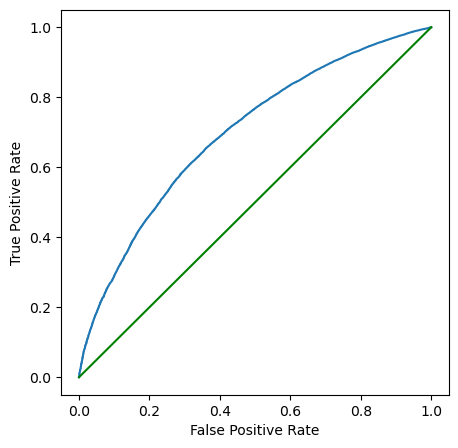

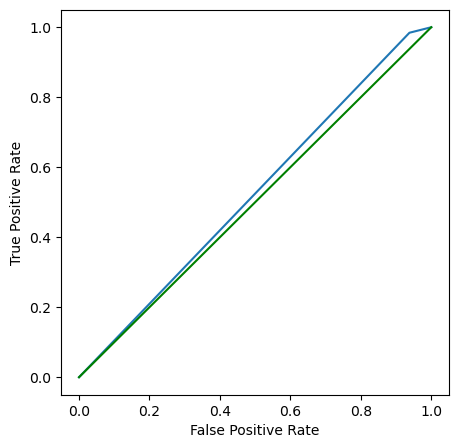

In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, predictions)

**Comment:** Area under the ROC curve shows that the performance of the Logistic regression model is much better than the mean model.

## Precision Recall Curve & comments 

In [141]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore,_ = precision_recall_fscore_support(y_test, predictions, average='micro')

In [142]:
print("precision = ", precision)
print("recall = ", recall)
print("fscore = ", fscore)

precision =  0.8041831181304023
recall =  0.8041831181304023
fscore =  0.8041831181304023


**Comment:** precision, recall and f1 score are all above 80 % whic is a very good performance score for this Logistic regression model

## Classification Report (Confusion Matrix, F1 score)

### Confusion Matrix

[[  908 13727]
 [  953 59380]]


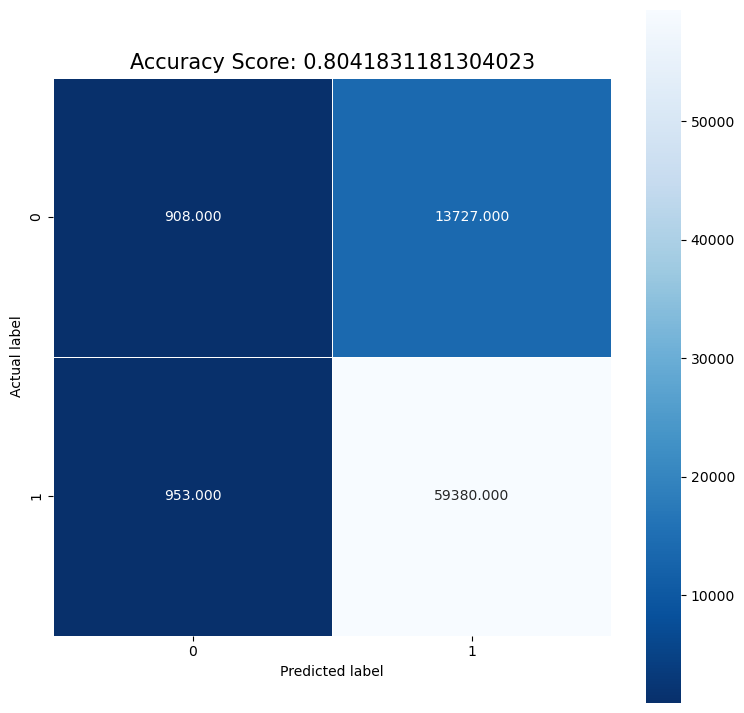

In [132]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### F1 Score

In [133]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='micro')

0.8041831181304023

## How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

As seen above the precision and F1 score are above 80% which would make sure that we reduce the False positives as much as possible, and identify only the genuine candidates for loan approval.

## Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

A high precision and accuracy score of the model ensures we identify each loan status correctly thereby ensuring identification 
of potential NPA early on. 

# Questionnaire 

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between Loan Amount and Installment features.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank's perspective, which metric should our primary focus be on..
  - ROC AUC
  - Precision
  - Recall
  - F1 Score
7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No)

In [161]:
loan  = pd.read_csv("loantap.csv")
loan.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [162]:
loan.describe(include=["object"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [158]:
318357/396030  # What percentage of customers have fully paid their Loan Amount?

0.8038709188697826

In [ ]:
# Comment about the correlation between Loan Amount and Installment features.
Loan Ammount and installment are very highly correlated with a coefficient of correlation of 0.95

In [ ]:
The majority of people have home ownership as Mortgage

In [184]:
temp = pd.crosstab(index=loan['grade'],
            columns=loan['loan_status'])
temp # yeah people with grade A are more likely to fully pay off loan

loan_status,Charged Off,Fully Paid
grade,,
A,4036,60151
B,14587,101431
C,22449,83538
D,18338,45186
E,11765,19723
F,5037,6735
G,1461,1593


In [186]:
loan["emp_title"].value_counts() # Top 2 afforded Job titles are Teacher and Manager

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
Precision is more important since giving loan to a bad candidate may end up as NPA and hurt the revenue negatively . 
So reducing false positives is of extreme importance

In [ ]:
How does the gap in precision and recall affect the bank?

Precision and Recall is a fine balance of trade off that has to be achieved. Since high recall might end up in too much NPA 
whereas Too high precision might hurt new sources for revenue 

In [ ]:
Which were the features that heavily affected the outcome?

loan_amt, annual_inc and revol_bal has the most impact on the outcome

In [ ]:
Will the results be affected by geographical location?

No. SO the column was dropped